In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

from keras.models import Sequential,model_from_json,load_model
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model

Using TensorFlow backend.


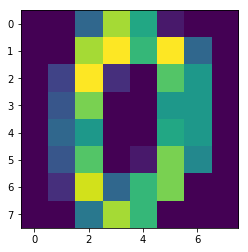

label:  0


In [11]:
data = datasets.load_digits()
plt.imshow(data.images[0])    # show first number in the dataset
plt.show()
print('label: ', data.target[0])    # label = '0'

In [12]:
X_data = data.images
y_data = data.target

# shape of data
print(X_data.shape)    # (8 X 8) format
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [4]:
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))

# one-hot encoding of y_data
y_data = to_categorical(y_data)

# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [25]:
model = Sequential()

In [26]:
# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

# prior layer should be flattend to be connected to dense layers
model.add(Flatten())

# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))

# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))

In [27]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [19]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 5, verbose = 1)

Train on 1005 samples, validate on 252 samples
Epoch 1/5
1005/1005 [==============================] - 0s 52us/step - loss: 0.0150 - acc: 1.0000 - val_loss: 0.0551 - val_acc: 0.9841
Epoch 2/5
1005/1005 [==============================] - 0s 49us/step - loss: 0.0136 - acc: 1.0000 - val_loss: 0.0592 - val_acc: 0.9802
Epoch 3/5
1005/1005 [==============================] - 0s 45us/step - loss: 0.0137 - acc: 1.0000 - val_loss: 0.0547 - val_acc: 0.9841
Epoch 4/5
1005/1005 [==============================] - 0s 46us/step - loss: 0.0119 - acc: 1.0000 - val_loss: 0.0532 - val_acc: 0.9802
Epoch 5/5
1005/1005 [==============================] - 0s 40us/step - loss: 0.0106 - acc: 1.0000 - val_loss: 0.0553 - val_acc: 0.9841


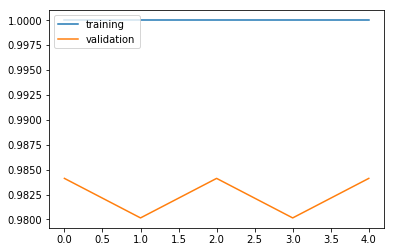

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

## Save and load a model

### Save the weights

In [21]:
model.save_weights('model_weights.h5')

### Save the model architecture

In [22]:
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [9]:

# Model reconstruction from JSON file
with open('model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('model_weights.h5')

In [10]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [11]:
model.evaluate(X_test, y_test)[1]

540/540 [==============================] - 0s 101us/step


0.9740740749571059

# Entire model

This single HDF5 file will contain:

- the architecture of the model (allowing the recreation of the model)
- the weights of the model
- the training configuration (e.g. loss, optimizer)
- the state of the optimizer (allows you to resume the training from exactly where you left off)

In [ ]:
# Creates a HDF5 file 'my_model.h5'
model.save('my_model.h5')

# Deletes the existing model
del model  

In [5]:
# Returns a compiled model identical to the previous one
model = load_model('my_model.h5')

In [6]:
model.evaluate(X_test, y_test)[1]

540/540 [==============================] - 0s 104us/step


0.9740740749571059

In [2]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

from data.CIFAR100_labels import labels

In [51]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

labels = np.arange(10)

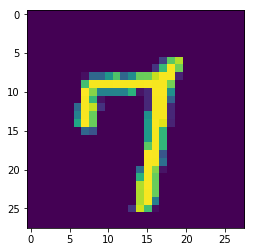

label:  7


In [52]:
ii = np.random.randint(1000)
plt.imshow(x_train[ii,:,:,0])    # show first number in the dataset
plt.show()
print('label: ', labels[int(y_train[ii])])    # label = '0'

In [53]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [54]:
x_train = x_train[:10000]
x_test = x_test[:1000]
y_train = y_train[:10000]
y_test = y_test[:1000]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(10000, 28, 28, 1) (10000, 10) (1000, 28, 28, 1) (1000, 10)


In [55]:
model = Sequential()

model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                 filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# prior layer should be flattend to be connected to dense layers
model.add(Flatten())
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))
# final layer with 10 neurons to classify the instances
model.add(Dense(y_train.shape[1], activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        14432     
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_21 (Activation)   (None, 14, 14, 32)        0         
__________

In [33]:
plot_model(model, to_file='model.png')

In [57]:
history = model.fit(x_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 3, verbose = 1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/3
3400/8000 [===========>..................] - ETA: 16s - loss: 1.3812 - acc: 0.6324

KeyboardInterrupt: 

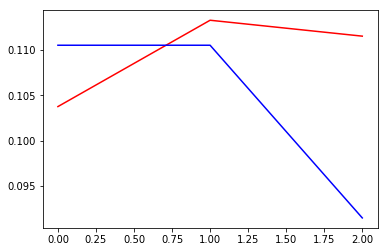

In [48]:
plt.plot(history.history['acc'],'red')
plt.plot(history.history['val_acc'],'blue')

### Changing Learning rate after every epoch.

In [58]:
from keras.callbacks import LearningRateScheduler

def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=1, verbose=0):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        lr = initial_lr * (decay_factor ** np.floor(epoch/step_size))
        if verbose:
            print('show:',lr)
        return lr
    
    return LearningRateScheduler(schedule,verbose=verbose)

lr_sched = step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, verbose=1)

In [65]:
history = model.fit(x_train, y_train,
                    batch_size = 50,
                    validation_split = 0.2,
                    epochs = 3, verbose = 1,
                    callbacks=[lr_sched])

Train on 8000 samples, validate on 2000 samples
Epoch 1/3
show: 0.001

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
1050/8000 [==>...........................] - ETA: 23s - loss: 0.1271 - acc: 0.9562

KeyboardInterrupt: 

### Stop training when a monitored quantity has stopped improving.

In [60]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 1,
                          verbose = 1,
                          restore_best_weights = True)

In [66]:
history = model.fit(x_train, y_train,
                    batch_size = 50,
                    validation_split = 0.2,
                    epochs = 3, verbose = 1,
                    callbacks=[lr_sched,earlystop])

Train on 8000 samples, validate on 2000 samples
Epoch 1/3
show: 0.001

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
8000/8000 [==============================] - 31s 4ms/step - loss: 0.1170 - acc: 0.9665 - val_loss: 0.2064 - val_acc: 0.9395
Epoch 2/3
show: 0.00075

Epoch 00002: LearningRateScheduler setting learning rate to 0.00075.
4600/8000 [================>.............] - ETA: 12s - loss: 0.0644 - acc: 0.9802

KeyboardInterrupt: 

### Save the model after every epoch.

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size = 50,
                    validation_split = 0.2,
                    epochs = 3, verbose = 1,
                    callbacks=[lr_sched,earlystop,checkpoint])

### Callback that terminates training when a NaN loss is encountered.


In [ ]:
keras.callbacks.callbacks.TerminateOnNaN()